# The Scikit Learn Python Library Overview

The scikit-learn (Sklearn) library contains simple and efficient tools for predictive data analysis.

It is the most useful and robust library for machine learning in Python. It provides a range of efficient tools for machine learning and statistical modeling [1]
It includes tools for:
- Classification: A process of categorizing a set of data into classes. Can be done on structured and unstructured data [2]
- Regression: Regression models are used to predict a continuous value.[3]
- Clustering : Clustering is grouping unlabeled examples to understand a data set. Common applications of clustering includes social network analysis, search result grouping, medical imaging[4]
- Dimensionality reduction: Techniques that reduce the number of input variable in training data. High demensional data might have hundres, thousands or even millions of input variables. Fewer inputs means fewer parameters or a simpler structure in the machine learning model. [5]

SKlearn is built upon NumPy, SciPy and Matplotlib




## Features
The Scikit-learn library is focused on modeling data. Some of the most popular models in the library include:
- Supervised learning algorithms : Almost all of the popular learning algorithms are part of scikit-learn. E.g. Linear Regression, Support Vector Machine, Decision Tree
- Unsupervised learning algorithms: Also has the popular unsupervised learning algorithms. E.g. clustering, factor analysis, PCA.
- Cross Validation : Used to check the accuracy of supervised models on unseen data.
- Ensemble Methods: Used to check the accuracy of supervised models on unseen data.

### Estimators - Learning and Predicting

Sklearn provides dozens of estimators which are built-in machine learning algorithms and models[6]. Each estimator can be fitted to some data using its fit method. This allows the estimator to learn from the model.

In [1]:
#example of fitting a RandomForestClassifier estimator to some basic data
from sklearn.ensemble import RandomForestClassifier as rfc
clf = rfc(random_state=0)

In [2]:
X = [[ 1,  2,  3],  # 2 samples, 3 features
    [11, 12, 13]]
y = [0, 1]  # classes of each sample
clf.fit(X, y)

RandomForestClassifier(random_state=0)

The fit method accepts 2 inputs:

1. The sample/design matrix, X. X represents data that is observed at training and prediction time. The size of X is typically (n_samples, n_features). This means that __samples are represented as rows__ and __features are represented as columns__.   
__Features are how samples are represented in a numeric or caterogical quantity.__[7]   

2. __The target values y__ which are real numbers for regression tasks, or integers for classification (or any other discrete set of values). For unsupervized learning tasks, y does not need to be specified. y is usually 1d array where the i th entry corresponds to the target of the i th sample (row) of X. 

Both X and y are usually expected to be numpy arrays.
Once the estimator is fitted, it can be used for predicting target values of new data. You don’t need to re-train the estimator:

## Sklearn Tutorial Example
In this example the task of the digits dataset is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.[8]

In [23]:
#sklearn.svm.SVC is an example of an estimator. SVC stands for support vector classification. 
from sklearn import svm
import matplotlib.pyplot as plt
clf = svm.SVC(gamma=0.001, C=100.)

In [24]:
#Estimator is fitter to the model through the fit method. This means the estimator must learn from this model
#Use all images from the dataset, except for the last which will be reserved for predicting
clf.fit(digits.data[:-1], digits.target[:-1])

NameError: name 'digits' is not defined

In [11]:
clf.predict(digits.data[-1:])

NameError: name 'digits' is not defined

The result is that the number best matching the below image is the number 8. [9]

In [12]:
# Load the digits dataset
digits = datasets.load_digits()

# Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

NameError: name 'datasets' is not defined

### Conventions
#### Type casting
Unless otherwise specified, input will be cast to float64.  
Regression targets are cast to float64 and classification targets are maintained. [8]  
Here the Support Vector Machine algorithm (sklearn.svm) is used.

In [13]:
import sklearn as sk
from sklearn import datasets
from sklearn.svm import SVC

iris = datasets.load_iris()
clf=SVC()

In [14]:
clf.fit(iris.data, iris.target)
SVC()

SVC()

In [15]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

Here, the first predict() returns an integer array, since iris.target (an integer array) was used in fit.

In [16]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC()

In [17]:
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

Here, predict() returns a string array, since iris.target_names was for fitting.

# Support Vector Machines Algorithm(SVM)
SVM is a supervised machine learning algorithm that can be used for both classificaiton or regression challenges. Their most common use is classification however.  
Support Vector Machines are based on the idea of finding a hyperplane that best divides a dataset into classes.  

#### Support Vectors   
Support Vectors are points on a graph that are closest to the hyperplane. If they are removed, it would affect the position of the hyperplane and as such they are considered the key elements of a dataset.

### Hyperplane
If a classification task only has two features, then a hyperplane would be a line that linearly separates and classifies a set of data on a 2d graph. The further a data point is from the hyperplane, the probabilty that it has been classified correctly increases. This means that when new testing data is added, the side of the hyperplane it lands on decides the class it is assigned to.[11]

#### What if there is no clear hyperplane?
In order to classify complex datasets, __kernelling__ is employed. Instead of a 2d graph, the data is plotted onto a higher dimensional graph to allow a hyperplane to be formed. This means that the hyperplane can no lionger be a line, it must be a plane

### Example of using the Linear Support Vector Machine algorithm to classify data
Below, we will generate two random clusters, and attempt to classify them using the Support Vector Machine algorithm. I will use the a linear problem for the sake of simplicity.

In [13]:
#allows me to generate data myself
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [133]:
#Generate data using make blobs method.[13]
#Pass it number of samples(datapoints) 
#Centers how many centers there will be for clusters
X,y= make_blobs(n_samples=125,centers=2,
                #select standard deviation, this is how spread out the values are
                cluster_std=0.5,random_state=0)

#Total number of samples, divided equally between features
print(X.size)
#Amount of samples in each cluster
print(y.size)

250
125


In [134]:
#Divide into training and test sets
train_X,test_X, train_y,test_y=train_test_split(X,y,test_size=20, random_state=0)

#So what this does is takes the specified amount of samples from X and y values created
#by make_blobs and splits it into X and y test subsets called test_X and text_y
#The remainder of the samples is put into train_X and train_y[13]
print(train_X.size)
print(train_y.size)

print(test_X.size)
print(test_y.size)

210
105
40
20


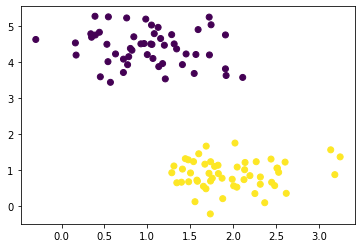

In [145]:
#create a scatter plot using the training data

#stores the first cluster in the first index position(purple)
#stores second cluster in the second index position(yellow)
#c allows the two clusters to be colour divied
plt.scatter(train_X[:,0], train_X[:,1],c=train_y)

We have divided the clusters into two groups, 0 and 1, based on their x and y positions.

In [136]:
#linear kernel because data is linearly separable
svc = SVC(kernel='linear')
#train estimator with training data
svc.fit(train_X,train_y)

SVC(kernel='linear')

Once the SVM is fitted, using the sklearn Support Vector Classification, we are able categorize our data(classify) into classes. In this case 0 and 1. Below, we can see with the help of the above graph, that the first 5 test samples are classified correctly.

In [154]:
print(test_X[:5])
print(svc.predict(test_X[:5]))

[[ 2.64928242  1.05613497]
 [ 0.64003985  4.12401075]
 [ 0.65910903  4.12241674]
 [ 1.64858539  0.1644515 ]
 [ 2.80250979 -0.13732885]]
[1 0 0 1 1]


The next 5 samples are also classified correctly.

In [157]:
print(test_X[5:10])
print(svc.predict(test_X[5:10]))

[[1.8062513  1.86242969]
 [2.03562611 0.31361691]
 [1.35678894 4.36462484]
 [1.93774109 5.04404472]
 [0.77468161 4.91500986]]
[1 1 0 0 0]


This can be shown clearly if we introduce a hyperplane to our plot. 

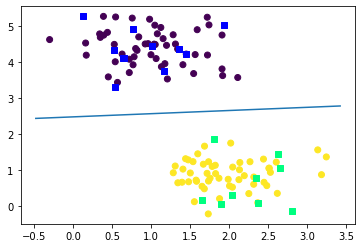

In [155]:
plt.scatter(train_X[:,0], train_X[:,1],c=train_y)

#get the axes
ax=plt.gca()
#range of x values
xlim= ax.get_xlim()

#add another scatter plot using the test set. Mark this plot using squares(marker='s')
ax.scatter(test_X[:,0], test_X[:,1],c=test_y, cmap='winter', marker='s')

#Weights assigned to the features
w=svc.coef_[0]

#slope of line
a=-w[0]/w[1]

#range of x values for the hyperplane
xx=np.linspace(xlim[0],xlim[1])

#equation of the line
#slope * all the x values - the intercept
yy=a * xx-(svc.intercept_[0]/w[1])
plt.plot(xx,yy)
plt.show()

Thanks to the hyperplane, we can clearly see that all our test data, which is represented as squares, was classified correctly.

### Classification 
SVC, NuSVC and LinearSVC are classes able to perform binary and multi-class classification on a dataset.  
SVC and NuSVC are very similar. The difference is that they accept different parameters an have different mathematical formulations.

The LinearSVC method applied a linear kernel function to perform classification. It performs well with a large number of samples. A linear kernel is used when the data is linearly separable i.e. can be separated on a graph using a single line. It is mostly used when there are a large number of features in a data set e.g. text classification. Each alphabet is a new feature. [12]

The main advantage of using a linear kernel is that the training process is faster than any other kernel.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

#import data
iris = datasets.load_iris()

In [20]:
# Take only the first two features of Data.
X = iris.data[:, :2]
y = iris.target

In [21]:
# C is the SVM regularization parameter
C = 1.0 

In [22]:
# Call fit so that the estimator learns from the data
svc = svm.SVC(kernel ='linear', C = 1).fit(X, y)

# create a mesh to plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
         np.arange(y_min, y_max, h))

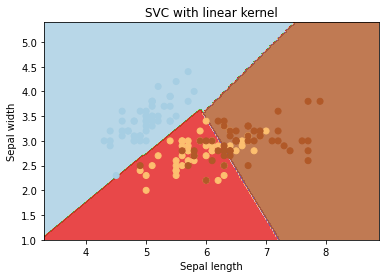

In [23]:
# Plot the data for Proper Visual Representation
plt.subplot(1, 1, 1)

# Predict the result by giving Data to the model
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
  
# Output the Plot
plt.show()

In this graph, all features are separated using simple lines, which represents the linear kernel.

## References
[1] https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htm  

[2] https://www.edureka.co/blog/classification-in-machine-learning/  

[3] https://medium.datadriveninvestor.com/regression-in-machine-learning-296caae933ec  

[4] https://developers.google.com/machine-learning/clustering/overview  

[5] https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/  

[6] https://scikit-learn.org/stable/getting_started.html  

[7] https://scikit-learn.org/stable/glossary.html#term-feature  

[8] https://scikit-learn.org/stable/tutorial/basic/tutorial.html#loading-an-example-dataset

[9] https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html  

[10] https://scikit-learn.org/stable/modules/grid_search.html  

[11] https://www.analyticsvidhya.com/blog/2014/10/support-vector-machine-simplified/?utm_source=blog&utm_medium=understandingsupportvectormachinearticle  

[12] https://www.geeksforgeeks.org/creating-linear-kernel-svm-in-python/  

[13] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html